# Linear Regression From Scratch

***
## Table of Contents
1. Loading Data
2. Linear Regression
3. Loss Function (MSE)
4. Gradient Descent
5. Encapsulation
6. Prediction and Visualisation
7. Compare with Scikit-Learn
***


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

## 1. Loading Data

In [2]:
linear_data = pd.read_csv("linear_data.txt", header=None)
x = np.array(linear_data.iloc[:, 0])
y = np.array(linear_data.iloc[:, 1])

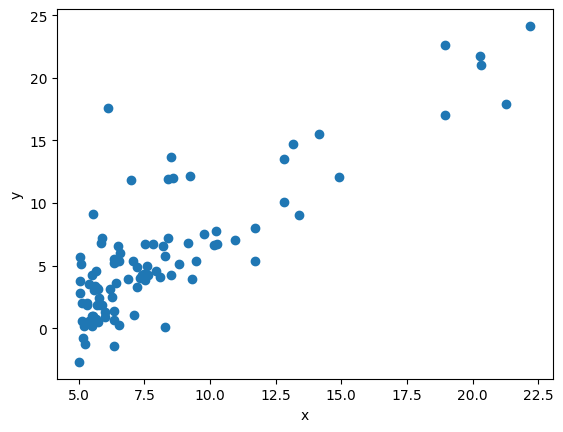

In [3]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 2. Linear Regression

A linear regression model provides numerical predictions as a straight line on a dataset, assuming a linear reiatonship between two numerical variables. The formula for a simple linear regression is:

\begin{align*}
h = wx + b
\end{align*}

Where:

- $x$ is the independent variable.
- $w$ is the slope (weight, coefficient of $x$).
- $b$ is the intercept (bias, constant term).

In [4]:
# Linear function h
def h(w: float, b: float, x: float) -> float:
    return w * x + b

## 3. Loss Function (MSE)
The loss function (or the cost function) quantifies the error between the predicted values produced by a model and the actual target values from the data. Common loss functions are Mean Squared Error (MSE) for regression problems, and Cross-Entropy Loss for classification tasks.
Here's the equation of MSE:

\begin{align*}
L = \dfrac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
\end{align*}
Where:
- $y$ is the actual value.
- $\hat{y}$ is the predicted value.
- $n$ is the number of data points.

MSE is simply the average squared difference between the actual and the predicted values in the dataset.

In [5]:
# Compute Loss function L - Mean Squared Error (MSE)
def calculate_loss_MSE(w: float, b: float, x: np.array, y: np.array) -> float:
    total_err: float = 0.0
    for i in range(len(x)):
        y_hat = h(w, b, x[i])
        total_err += (y[i]-y_hat) ** 2
    return total_err/len(x)

## 4. Gradient Descent


Gradient Descent is an algorithm that tries to find optimised hyperparameters by iteratively searching for a local minima of the loss function. It is one of the most important concepts in machine learning and is used to reduce errors when training models. There are four types of Gradient Descent: **Batch Gradient Descent**, **Stochastic Gradient Descent**, **Mini-Batch Gradient Descent** and **Momentum-Based Gradient Descent**. For practice purposes, the most basic type, **Batch Gradient Descent**, will be used in this notebook.

We compute the partial derivative of the loss function to determine the slope of the function at a given point. By iteratively adjusting the parameters of the model in the direction opposite to the gradient, the algorithm moves closer to the point where the cost function reaches its minimum value. This occurs when the slope of the function becomes zero, indicating that the gradient has flattened and the cost is minimised. When the slope is steep, we take a big step for each iteration. As we get closer to the optimised value, the step becomes smaller.

\begin{align*}
L &= \dfrac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 \\
&= \dfrac{1}{n} \sum_{i=1}^{n} (y_i - (w x_i + b))^2
\end{align*}


By applying the power rule $(f(x)^n)' = n \cdot f(x)^{n-1} \cdot f'(x)$, the derivatives of the loss function $L$ with respect to two different hyperparameters, $w$ and $b$, are described as follows:

\begin{align*}
\dfrac{dL}{dw} &= \dfrac{1}{n} \sum_{n=1}^{n} 2 \cdot (y_i - w x_i -b) \cdot \dfrac{\partial }{\partial w} (y_i - w x_i -b) \\
&= \dfrac{2}{n} \sum_{n=1}^{n} (y_i - w x_i -b) \cdot (-x_i) \\
&= - \dfrac{2}{n} \sum_{n=1}^{n} x_i (y_i - \hat{y_i})^2
\end{align*}



\begin{align*}
\dfrac{dL}{db} &= \dfrac{1}{n} \sum_{n=1}^{n} 2 \cdot (y_i - w x_i -b) \cdot \dfrac{\partial }{\partial b} (y_i - w x_i -b) \\
&= - \dfrac{2}{n} \sum_{n=1}^{n} (y_i - \hat{y_i})^2
\end{align*}

In [6]:
# Find the derivative of cost function L
def derivative_MSE(x: np.array, y: np.array, y_pred: np.array, n: int) -> tuple[float, float]:
    dL_dw: float = -2*np.sum((y - y_pred) * x) / n
    dL_db: float = -2*np.sum(y - y_pred) / n
    return dL_dw, dL_db

In each iteration (epoch) of the gradient descent, the derivatives aboves are calculated and the hyperparameters $w$ and $b$ are be updated as:

\begin{align*}
w_{new} = w_{old} - \alpha \cdot \dfrac{\partial L}{\partial w}
\end{align*}

\begin{align*}
b_{new} = b_{old} - \alpha \cdot \dfrac{\partial L}{\partial b}
\end{align*}
where $\alpha$ is called the learning rate, a scaler value that controls the step size of updates during gradient descent.

In [7]:
# Execute Batch Gradient Descent
def gradient_descent(w: float, b: float, x: np.ndarray[float], y: np.ndarray[float],
                     alpha: float, epochs: int, n: int) -> tuple[float, float, np.ndarray[float]]:
    loss_list: list[float] = []
    for _ in tqdm(range(epochs)):
        y_pred: float = h(w, b, x)
        loss_list.append(calculate_loss_MSE(w, b, x, y))
        dL_dw, dL_db = derivative_MSE(x, y, y_pred, n)
        w -= alpha * dL_dw
        b -= alpha * dL_db
    return w, b, np.array(loss_list)

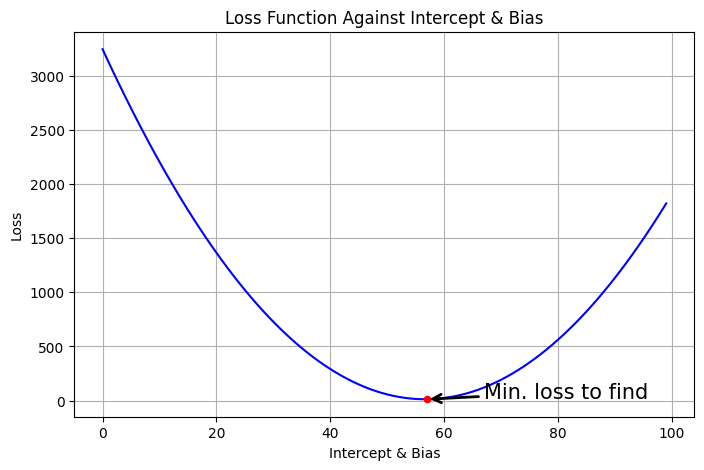

In [8]:
def plot_loss_function(w_list: np.ndarray[float], b_list: np.ndarray[float], x: np.ndarray[float],
                       y: np.ndarray[float]) -> None:
    trace_lf_list = []
    for w_val, b_val in zip(w_list, b_list):
        trace_lf_list.append(calculate_loss_MSE(w_val, b_val, x, y))
    trace_lf_w = np.array(trace_lf_list)
    plt.figure(figsize=(8, 5))
    plt.plot(trace_lf_w, color='b')

    min_loss_idx = np.argmin(trace_lf_w)
    min_loss_value = trace_lf_w[min_loss_idx]
    # Add a marker at the minimum value
    plt.scatter(min_loss_idx, min_loss_value,
                color="red", marker="o", s=20, zorder=5)
    plt.annotate(
        "Min. loss to find",
        xy=(min_loss_idx, min_loss_value),
        # Adjust arrow placement
        xytext=(min_loss_idx + 10, min_loss_value + 10),
        arrowprops=dict(facecolor="black", arrowstyle="->", lw=2),
        fontsize=15,
        color="black",
    )
    plt.title('Loss Function Against Intercept & Bias')
    plt.xlabel('Intercept & Bias')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()


random_w_vals = np.linspace(-5, 5, 100)
random_b_vals = np.linspace(-5, 5, 100)
plot_loss_function(random_w_vals, random_b_vals, x, y)

By tracing the curve of the loss function using arbitrary values for $w$ and $b$ (100 data points each evenly spaced between -5 and +5), we obtain a quadratic curve due to the squared term in the MSE formula. The red point at the bottom of the curve represents the point where the regression produces the least amount of error. Gradient descent attempts to find a value as close as possible to this point by optimising the hyperparameters.

Let's execute the gradient descent function assuming that $\alpha = 0.01$, $w=5$, and $b=3$.

In [9]:
# * alpha: Learning rate
alpha = 0.01
n = len(y)
epochs = 5000
# * Assume that w = 5 and b = 3
coeff_GD, intercept_GD, loss_array = gradient_descent(
    5, 3, x, y, alpha, epochs, n)
print(f'Coefficient (GD): {coeff_GD:.5f}, Intercept (GD): {intercept_GD:.5f}')

100%|██████████| 5000/5000 [00:00<00:00, 19465.08it/s]

Coefficient (GD): 1.19303, Intercept (GD): -3.89578


According to the obtained results, the optimised coefficient ($w$) and intercept ($b$) for this dataset are 1.19303 and -3.89578 respectively.

Notice that the total loss decreases over epochs as GD iteratively updates the hyperparameters.

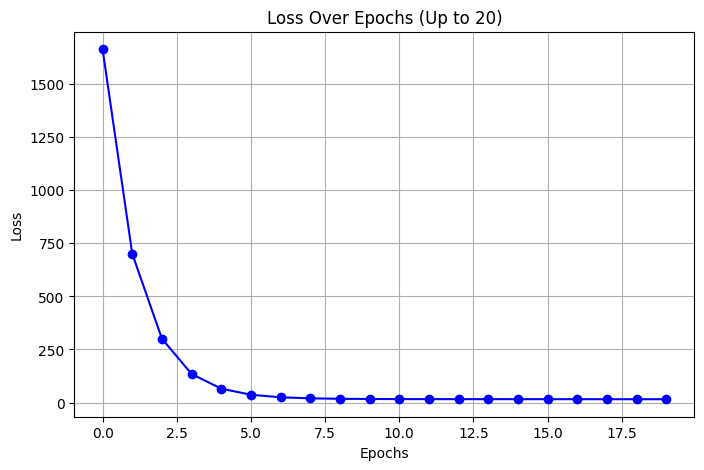

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(loss_array[:20], marker='o', color='b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs (Up to 20)')
plt.grid(True)
plt.show()

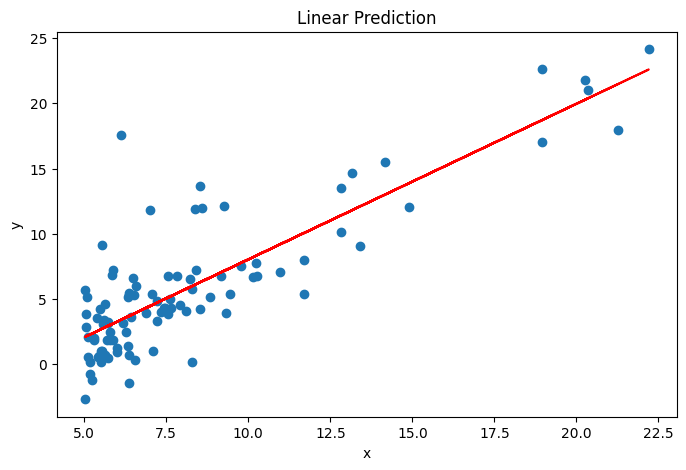

In [11]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y)
plt.plot(x, h(coeff_GD, intercept_GD, x), color="red")
plt.title('Linear Prediction')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## 5. Encapsulation
In practice, it is generally better to refactor these functions into a class-based implementation (encapsulation). It allows related functionalities to be grouped together, making the code more readable, reusable and easier to maintain. Let's encapsulate the functions above into a `CustomLinearRegression` class, including the visualisations.

In [12]:
class CustomLinearRegression:
    """
    A simple implementation of Linear Regression using gradient descent.
    """

    def __init__(self, w: float = 0.0, b: float = 0.0,
                 alpha: float = 0.01, epochs: int = 5000):
        """
        Initialise the CustomLinearRegression instance with given hyperparameters.

        Args:
            w (float): Initial weight (default is 0.0).
            b (float): Initial bias (default is 0.0).
            alpha (float): Learning rate for gradient descent (default is 0.01).
            epochs (int): Number of iterations for gradient descent (default is 5000).
        """
        self.w = w
        self.b = b
        self.alpha = alpha
        self.epochs = epochs
        self.loss_history = []

    def predict(self, x: float) -> float:
        """
        Predict the output for a given input using the regression line.

        Args:
            x (float): Input feature value.

        Returns:
            float: Predicted value.
        """
        return self.w * x + self.b

    def calculate_loss_MSE(self, y: np.ndarray[float], y_pred: np.ndarray[float]) -> float:
        """
        Calculate the Mean Squared Error (MSE) loss.

        Args:
            y (np.ndarray[float]): True output values.
            y_pred (np.ndarray[float]): Predicted output values.

        Returns:
            float: Mean Squared Error.
        """
        return np.mean((y - y_pred) ** 2)

    def gradient_descent(self, x: np.ndarray[float], y: np.ndarray[float]) -> None:
        """
        Perform gradient descent to optimise the regression parameters.

        Args:
            x (np.ndarray[float]): Input feature values.
            y (np.ndarray[float]): True output values.
        """
        n: int = len(y)
        for _ in tqdm(range(self.epochs)):
            y_pred = np.array([self.predict(x_i) for x_i in x])

            loss = self.calculate_loss_MSE(y, y_pred)
            self.loss_history.append(loss)

            dL_dw = -(2 / n) * np.sum(x * (y - y_pred))
            dL_db = -(2 / n) * np.sum(y - y_pred)

            self.w -= self.alpha * dL_dw
            self.b -= self.alpha * dL_db

    def train(self, x: np.ndarray[float], y: np.ndarray[float]) -> None:
        """
        Train the model using gradient descent.

        Args:
            x (np.array): Input feature values.
            y (np.array): True output values.
        """
        self.gradient_descent(x, y)
        print(
            f"Training completed. Coefficient: {self.w:.5f}, Intercept: {self.b:.5f}")

    def plot_loss_history(self) -> None:
        """
        Plot the training loss over epochs.
        """
        plt.figure(figsize=(8, 5))
        plt.plot(self.loss_history[:20], marker='o', color='b')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss Over Epochs (Up to 20)')
        plt.grid(True)
        plt.show()

    def plot_prediction(self, x: np.ndarray[float], x_test: np.ndarray[float],
                        y_pred_single: np.ndarray[float]) -> None:
        """
        Plot the regression line, training data, and test data point.

        Args:
            x (np.ndarray[float]): Input feature values for training data.
            x_test (float): Test input value.
            y_pred_single (float): Predicted output for the test input.
        """
        plt.figure(figsize=(8, 5))
        plt.scatter(x, y)
        plt.plot(x, self.predict(x), color="red", label="Predicted Values")
        plt.scatter(x_test, y_pred_single, color="orange",
                    edgecolor="black", label="Test Point", zorder=2)
        plt.title('Linear Prediction')
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.show()

100%|██████████| 5000/5000 [00:00<00:00, 21479.77it/s]


Training completed. Coefficient: 1.19303, Intercept: -3.89578


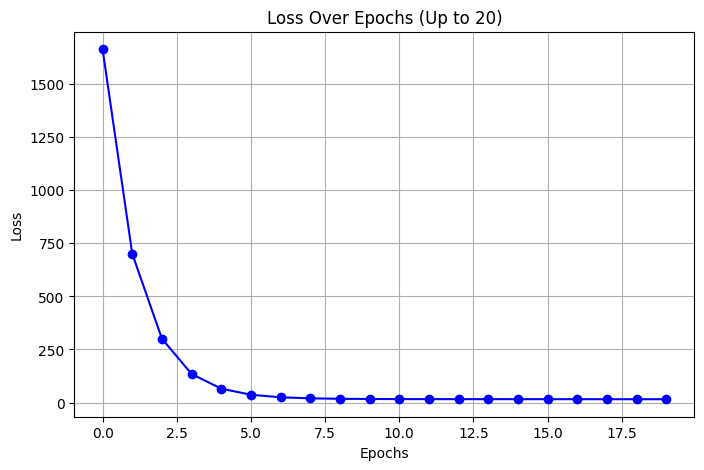

In [13]:
model = CustomLinearRegression(w=5, b=3, alpha=0.01, epochs=5000)
model.train(x, y)
model.plot_loss_history()

## 6. Prediction and Visualisation
Having successfully implemented our linear regression model, we can now use it to predict $y$ values for arbitrary $x$ inputs. For instance, given $x=15$, below are the prediction and correspoding visualisation:

Predicted value for x = 15: 13.99972


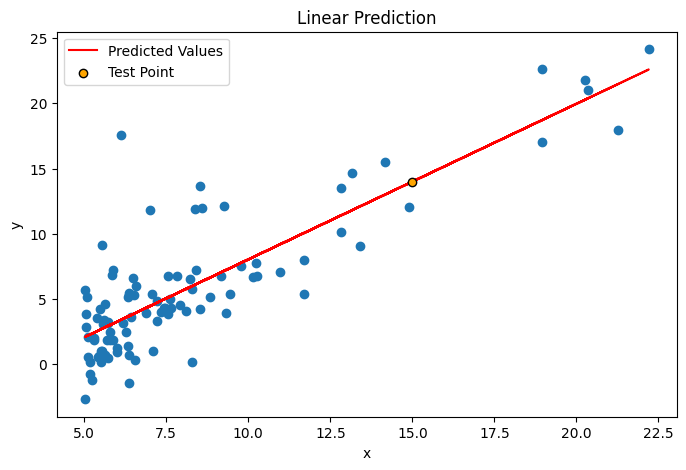

In [14]:
test_x = 15
predicted_value = model.predict(test_x)
print(f"Predicted value for x = {test_x}: {predicted_value:.5f}")
model.plot_prediction(x, 15, predicted_value)

## 7. Compare with Scikit-Learn
Scikit-learn is an open source library for machine learning in Python. It provides a plenty of tools that allow us to quickly build machine learning models.

In [15]:
from sklearn.linear_model import LinearRegression

# * For LinearRegression() from scikit-learn library, 2D arrays are expected.
x_sk = x.reshape(-1, 1)
y_sk = y.reshape(-1, 1)
lr = LinearRegression()
lr.fit(x_sk, y_sk)

# * .items() extracts the scalar value from the array, eliminating the outer brackets.
print(f'Intercept (sklearn): {lr.intercept_.item():.5f}')
print(f'Intercept (Custom): {model.b:.5f}')
print(f'Coef. of regression (sklearn): {lr.coef_.item():.5f}')
print(f'Coef. of regression (Custom): {model.w:.5f}')

Intercept (sklearn): -3.89578
Intercept (Custom): -3.89578
Coef. of regression (sklearn): 1.19303
Coef. of regression (Custom): 1.19303


In [16]:
test_x_sk = np.array([test_x]).reshape(-1, 1)
print(
    f'Predicted y value for x = 15 (sklearn): {lr.predict(test_x_sk)[0, 0]:.5f}')
print(f'Predicted y value for x = 15 (Custom): {model.predict(test_x):.5f}')

Predicted y value for x = 15 (sklearn): 13.99972
Predicted y value for x = 15 (Custom): 13.99972
